In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh

In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,1,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2016,5,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2014, 5, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2011, 10, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,1,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2016,5,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2014, 5, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2011, 10, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}

In [3]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
mfield_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift', 'datetime']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'ni', 'sn', \
               'l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2021, 4, 13)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '8y', '10y']

sim_products = commod_mkts
need_shift = 1
freq = 'd'
delim = '-'

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict

dbtbl_prefix = ''
args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'n': 1, 'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'n': 1, 'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'n': 1, 'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []
for idx, asset in enumerate(sim_products):
    use_args = args
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['sc']:
        use_args = sc_args    
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict[asset], start_date)
    use_args['end_date'] = end_date
    print("loading mkt = %s, args = %s" % (asset, use_args))
    df = misc.nearby(asset, **use_args)
    xfield_list = field_list
    if freq == 'm':
        df = misc.cleanup_mindata(df, asset)        
        df = df.reset_index().set_index(['date', 'min_id'])
        xfield_list = mfield_list
    #if (idx == 0) and (freq == 'm'):
    #    df_list.append(df[['date', 'min_id']])
    xdf = df[xfield_list]
    xdf.columns = [delim.join((asset, col)) for col in xdf.columns]
    df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False)

loading mkt = rb, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 4, 13)}
loading mkt = hc, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 5, 1), 'end_date': datetime.date(2021, 4, 13)}
loading mkt = i, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2021, 4, 13)}
loading mkt = j, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 1, 1), 'end_date': datetime.date(2021, 4, 13)}
loading mkt = jm, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2013, 7, 1), 'end_date': datetime.date(2021, 4, 13)}
loading mkt = ru, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'nee

In [5]:
print(df.columns)
wdf = df.reset_index().set_index('rb-datetime')
print(wdf.tail(10))


Index(['rb-open', 'rb-high', 'rb-low', 'rb-close', 'rb-volume',
       'rb-openInterest', 'rb-contract', 'rb-shift', 'rb-datetime', 'hc-open',
       ...
       'jd-datetime', 'jd-datetime', 'jd-datetime', 'jd-datetime',
       'jd-datetime', 'jd-datetime', 'jd-datetime', 'jd-datetime',
       'jd-datetime', 'jd-datetime'],
      dtype='object', length=784)
                          date  min_id  rb-open  rb-high  rb-low  rb-close  \
rb-datetime                                                                  
2021-03-26 14:50:00 2021-03-26    2050   4926.0   4933.0  4918.0    4929.0   
2021-03-26 14:51:00 2021-03-26    2051   4929.0   4934.0  4926.0    4928.0   
2021-03-26 14:52:00 2021-03-26    2052   4927.0   4931.0  4922.0    4931.0   
2021-03-26 14:53:00 2021-03-26    2053   4930.0   4930.0  4924.0    4927.0   
2021-03-26 14:54:00 2021-03-26    2054   4927.0   4927.0  4921.0    4927.0   
2021-03-26 14:55:00 2021-03-26    2055   4926.0   4929.0  4922.0    4924.0   
2021-03-26 14:56

In [5]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.2])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    select_cols = []
    for col in df.columns:
        col_split = col.split(delim)
        if col_split[0] in product_list:
            select_cols.append(col)
    xdf= df[select_cols].sort_index().fillna(method='ffill').copy()
    if start_date:
        xdf = xdf[xdf.index>= start_date]
    if end_date:
        xdf = xdf[xdf.index<= end_date]
    for asset in product_list:
        if need_shift == 1:
            xdf[delim.join((asset, 'lr'))] = np.log(xdf[delim.join((asset, 'close'))] \
                                                        -xdf[delim.join((asset, 'shift'))]) \
                                            - np.log(xdf[delim.join((asset, 'close'))].shift(1) \
                                                        -xdf[delim.join((asset, 'shift'))])
        else:
            xdf[delim.join((asset, 'lr'))] = \
                np.log(xdf[delim.join((asset, 'close'))])- np.log(xdf[delim.join((asset, 'close'))].shift(1))
        xdf[delim.join((asset, 'mom'))] = xdf[delim.join((asset, 'lr'))].rolling(mom_win).sum()
        if run_mode == 'momma':
            xdf[delim.join((asset, 'momma'))] = xdf[delim.join((asset, 'mom'))].rolling(ma_win).mean()
        elif run_mode == 'mixedmom':       
            xdf[delim.join((asset, 'tmpos'))] = xdf[delim.join((asset, 'lr'))].rolling(mom_win).agg(lambda x: (x>0).sum()/mom_win)
            xdf[delim.join((asset, 'tmneg'))] = xdf[delim.join((asset, 'lr'))].rolling(mom_win).agg(lambda x: (x<0).sum()/mom_win)        
        elif run_mode == 'rsi':
            rsi_output = dh.RSI_F(xdf, mom_win, prefix = asset + delim)
            xdf[delim.join((asset, 'rsi'))] = rsi_output[asset + delim + 'RSI' + str(mom_win)]
        elif run_mode == 'rsima':
            rsi_output = dh.RSI_F(xdf, mom_win, prefix = asset + delim)
            xdf[delim.join((asset, 'rsi'))] = rsi_output[asset + delim + 'RSI' + str(mom_win)]
            xdf[delim.join((asset, 'rsima'))] = dh.EMA(xdf, ma_win, field = 'rsi', prefix = asset + delim)
        elif run_mode == 'madist':
            xdf[delim.join((asset, 'ema1'))] = dh.EMA(xdf, mom_win, field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'ema2'))] = dh.EMA(xdf, int(mom_win * params[0]), field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'std'))] = dh.STDEV(xdf, ma_win, field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'madist'))] = (xdf[delim.join((asset, 'ema1'))] - xdf[delim.join((asset, 'ema2'))])/xdf[delim.join((asset, 'std'))]
            xdf[delim.join((asset, 'nmadist'))] = xdf[delim.join((asset, 'madist'))]/dh.STDEV(xdf, int(ma_win * params[1]), field = 'madist', prefix = asset + delim)
            xdf[delim.join((asset, 'sig'))] = xdf[delim.join((asset, 'nmadist'))].apply(lambda x: dh.response_curve(x, "reverting", param = 2.0))
        if need_shift == 1:        
            orig_close = xdf[delim.join((asset, 'close'))] -xdf[delim.join((asset, 'shift'))]
            if pos_std == 1:
                xdf[delim.join((asset, 'std'))] = dh.ATR(df, vol_win, prefix = asset + delim).fillna(method='bfill') * 10.0
            else:
                xdf[delim.join((asset, 'std'))] = orig_close
        elif need_shift == 2:
            orig_close = xdf[delim.join((asset, 'close'))] * np.exp(-xdf[delim.join((asset, 'shift'))])
            if pos_std == 1:
                xdf[delim.join((asset, 'std'))] = (np.log(xdf[delim.join((asset, 'close'))]) \
                                - np.log(xdf[delim.join((asset, 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close * 10
            else:
                xdf[delim.join((asset, 'std'))] = orig_close
        else:
            orig_close = xdf[delim.join((asset, 'close'))]
            xdf[delim.join((asset, 'std'))] = orig_close
        
    total_risk = 5000000.0
    margin_rate = [0.08, 0.08]
    
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    mom_df = xdf[[delim.join((asset, 'mom')) for asset in product_list]]
    mom_df.columns = product_list
    
    xdf['prod_count'] = mom_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    xdf['rebal_seqno'] = range(len(xdf.index))

    long_pos = pd.DataFrame(0, columns = product_list, index = xdf.index)
    short_pos = pd.DataFrame(0, columns = product_list, index = xdf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=product_list, index = xdf.index)
        short_tmp = pd.DataFrame(columns=product_list, index = xdf.index)
        rebal_flag = xdf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in product_list:
            if run_mode == 'momma':
                long_tmp.loc[(xdf[delim.join((asset, 'mom'))] > xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(xdf[delim.join((asset, 'mom'))] < xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 0.0
                short_tmp.loc[(xdf[delim.join((asset, 'mom'))] < xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(xdf[delim.join((asset, 'mom'))] > xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 0.0            
            elif run_mode == 'mixedmom':
                long_tmp.loc[(xdf[delim.join((asset, 'mom'))] > 0.0) & (xdf[delim.join((asset, 'tmpos'))] > 0.5) & rebal_flag, asset] = 1.0
                long_tmp.loc[((xdf[delim.join((asset, 'mom'))] <= 0.0) | (xdf[delim.join((asset, 'tmpos'))] <= 0.5)) & rebal_flag, asset] = 0.0            
                short_tmp.loc[(xdf[delim.join((asset, 'mom'))] < 0.0) & (xdf[delim.join((asset, 'tmneg'))] > 0.5) & rebal_flag, asset] = 1.0
                short_tmp.loc[((xdf[delim.join((asset, 'mom'))] >= 0.0) | (xdf[delim.join((asset, 'tmneg'))]<= 0.5)) & rebal_flag, asset] = 0.0
            elif run_mode == 'rsi':
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] > 50 + params[0] * 100) & rebal_flag, asset] = 1.0
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] <= 50 - params[0] * 100)  & rebal_flag, asset] = 0.0            
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] < 50.0 - params[0] * 100) & rebal_flag, asset] = 1.0
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] >= 50.0 + params[0] * 100) & rebal_flag, asset] = 0.0
            elif run_mode == 'rsima':
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] > xdf[delim.join((asset, 'rsima'))]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] <= xdf[delim.join((asset, 'rsima'))])  & rebal_flag, asset] = 0.0            
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] < xdf[delim.join((asset, 'rsima'))]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] >= xdf[delim.join((asset, 'rsima'))]) & rebal_flag, asset] = 0.0
            elif run_mode == 'madist':
                long_tmp.loc[(xdf[delim.join((asset, 'sig'))] > 0.0) & rebal_flag, asset] = xdf[delim.join((asset, 'sig'))]
                long_tmp.loc[(xdf[delim.join((asset, 'sig'))] <= 0.0)  & rebal_flag, asset] = 0.0
                short_tmp.loc[(xdf[delim.join((asset, 'sig'))] < 0.0) & rebal_flag, asset] = -xdf[delim.join((asset, 'sig'))]
                short_tmp.loc[(xdf[delim.join((asset, 'sig'))] >= 0.0) & rebal_flag, asset] = 0.0

        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp
        short_pos = short_pos + short_tmp
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(product_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk \
                    /(xdf['prod_count'] * rebal_freq * xdf[delim.join((asset,'std'))].astype('float'))).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk \
                    /(xdf['prod_count'] * rebal_freq * xdf[delim.join((asset,'std'))].astype('float'))).shift(1).fillna(method='ffill')
        xdf[delim.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        xdf[delim.join((asset, 'traded_price'))] = xdf[delim.join((asset, 'open'))]
        xdf[delim.join((asset, 'pos'))].iloc[-1] = 0
        xdf[delim.join((asset, 'cost'))] = \
                abs(xdf[delim.join((asset, 'pos'))] \
                - xdf[delim.join((asset, 'pos'))].shift(1)) * offset
        xdf[delim.join((asset, 'cost'))] = xdf[delim.join((asset, 'cost'))].fillna(0.0)
        fields = [delim.join((asset, field)) for field in extract_fields] 
        tdf = xdf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = xdf['date']
            tdf['min_id'] = xdf['min_id']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = 1.0)
        
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = 1.0)
    pos_df  = xdf[[delim.join((asset, 'pos')) for asset in product_list]]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res

<ipython-input-6-b7f793bc0108>:53: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_pnl = pd.Series()
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


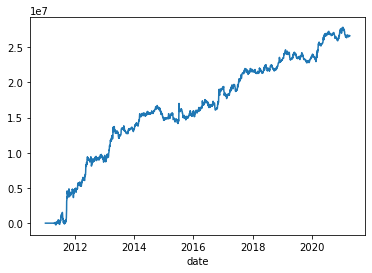

                 momma-commod_mkts-40-30-5
sharp_ratio_10y                   1.195371
sharp_ratio_1y                    0.692941
sharp_ratio_2y                    0.959455
sharp_ratio_3y                    0.961063
sharp_ratio_4y                    1.034872
sharp_ratio_5y                    1.048843
sharp_ratio_6y                    0.905563
sharp_ratio_8y                    0.897199
std_pnl_10y                  145467.976117
std_pnl_1y                   109940.111741
std_pnl_2y                   114063.650176
std_pnl_3y                   112732.648380
std_pnl_4y                   116498.618225
std_pnl_5y                   124860.947446
std_pnl_6y                   133384.869282
std_pnl_8y                   131626.109373


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


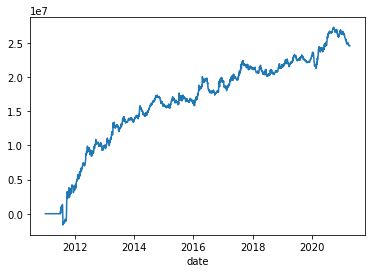

                 momma-commod_mkts-40-80-5
sharp_ratio_10y                   1.018362
sharp_ratio_1y                    0.350863
sharp_ratio_2y                    0.591938
sharp_ratio_3y                    0.535806
sharp_ratio_4y                    0.573336
sharp_ratio_5y                    0.569964
sharp_ratio_6y                    0.607551
sharp_ratio_8y                    0.750047
std_pnl_10y                  157527.660949
std_pnl_1y                   125213.567910
std_pnl_2y                   138691.609563
std_pnl_3y                   132476.599669
std_pnl_4y                   134303.925149
std_pnl_5y                   137871.613781
std_pnl_6y                   143015.853258
std_pnl_8y                   140296.715993


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


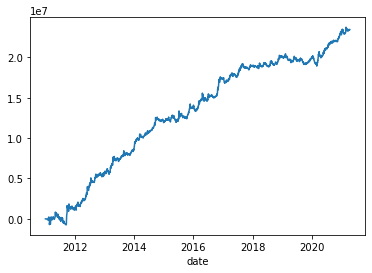

                 mixedmom-commod_mkts-10-1-10
sharp_ratio_10y                      1.622358
sharp_ratio_1y                       2.587859
sharp_ratio_2y                       1.521194
sharp_ratio_3y                       1.315986
sharp_ratio_4y                       1.204915
sharp_ratio_5y                       1.399310
sharp_ratio_6y                       1.393692
sharp_ratio_8y                       1.602626
std_pnl_10y                      93612.847741
std_pnl_1y                       80386.726480
std_pnl_2y                       80610.357480
std_pnl_3y                       74953.527618
std_pnl_4y                       75953.133141
std_pnl_5y                       80186.297514
std_pnl_6y                       83874.721125
std_pnl_8y                       85065.385678


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


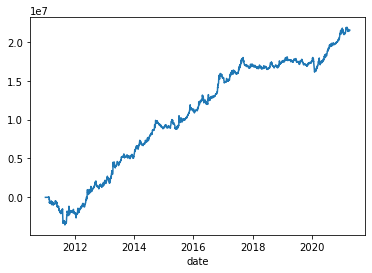

                 mixedmom-commod_mkts-20-1-10
sharp_ratio_10y                      1.286757
sharp_ratio_1y                       2.801121
sharp_ratio_2y                       1.187606
sharp_ratio_3y                       1.085556
sharp_ratio_4y                       0.935690
sharp_ratio_5y                       1.154043
sharp_ratio_6y                       1.200643
sharp_ratio_8y                       1.423738
std_pnl_10y                     113797.281240
std_pnl_1y                       96693.164464
std_pnl_2y                      105488.425491
std_pnl_3y                       95977.865074
std_pnl_4y                       96227.221787
std_pnl_5y                      101333.550725
std_pnl_6y                      104987.314430
std_pnl_8y                      105026.569904


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


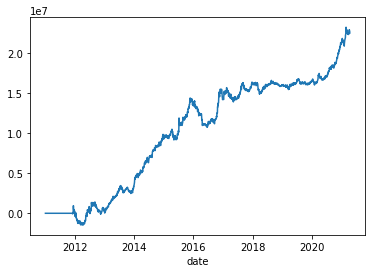

                 mixedmom-commod_mkts-220-1-10
sharp_ratio_10y                       1.314665
sharp_ratio_1y                        3.063586
sharp_ratio_2y                        2.187614
sharp_ratio_3y                        1.828999
sharp_ratio_4y                        1.430409
sharp_ratio_5y                        1.296357
sharp_ratio_6y                        1.142727
sharp_ratio_8y                        1.511455
std_pnl_10y                      111830.891643
std_pnl_1y                       116486.304076
std_pnl_2y                        97138.638841
std_pnl_3y                        88548.145377
std_pnl_4y                        91670.313166
std_pnl_5y                       103875.360562
std_pnl_6y                       115126.097560
std_pnl_8y                       112449.507186


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


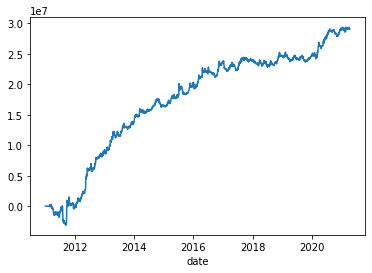

                 rsima-commod_mkts-30-40-5
sharp_ratio_10y                   1.316085
sharp_ratio_1y                    1.574220
sharp_ratio_2y                    1.469997
sharp_ratio_3y                    1.093237
sharp_ratio_4y                    0.855238
sharp_ratio_5y                    0.835091
sharp_ratio_6y                    0.939930
sharp_ratio_8y                    1.145755
std_pnl_10y                  147751.059305
std_pnl_1y                   116913.719785
std_pnl_2y                   115224.598974
std_pnl_3y                   111993.557281
std_pnl_4y                   114002.096446
std_pnl_5y                   120724.158443
std_pnl_6y                   129176.079679
std_pnl_8y                   127451.203168


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


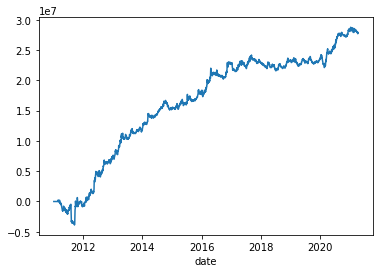

                 rsima-commod_mkts-30-110-5
sharp_ratio_10y                    1.220733
sharp_ratio_1y                     1.769949
sharp_ratio_2y                     1.369557
sharp_ratio_3y                     0.967947
sharp_ratio_4y                     0.689929
sharp_ratio_5y                     0.777294
sharp_ratio_6y                     0.940583
sharp_ratio_8y                     1.092097
std_pnl_10y                   153653.670997
std_pnl_1y                    124189.979579
std_pnl_2y                    125914.602313
std_pnl_3y                    119023.259868
std_pnl_4y                    122345.713215
std_pnl_5y                    128721.773219
std_pnl_6y                    136140.499673
std_pnl_8y                    134574.454384


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


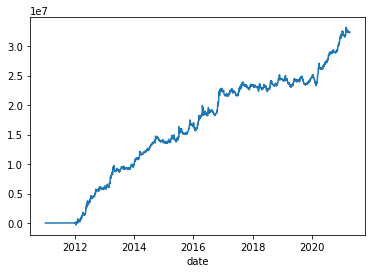

                 madist-commod_mkts-8-80-5
sharp_ratio_10y                   1.531977
sharp_ratio_1y                    2.951084
sharp_ratio_2y                    2.202092
sharp_ratio_3y                    1.586463
sharp_ratio_4y                    1.234513
sharp_ratio_5y                    1.299974
sharp_ratio_6y                    1.315326
sharp_ratio_8y                    1.382264
std_pnl_10y                  137877.617052
std_pnl_1y                   133033.272831
std_pnl_2y                   134340.188196
std_pnl_3y                   128864.816872
std_pnl_4y                   131008.739706
std_pnl_5y                   140239.250216
std_pnl_6y                   147073.598610
std_pnl_8y                   141573.952165


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


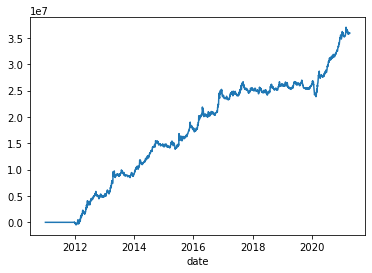

                 madist-commod_mkts-16-80-5
sharp_ratio_10y                    1.430529
sharp_ratio_1y                     3.220892
sharp_ratio_2y                     1.898955
sharp_ratio_3y                     1.413755
sharp_ratio_4y                     1.140067
sharp_ratio_5y                     1.190216
sharp_ratio_6y                     1.284197
sharp_ratio_8y                     1.358729
std_pnl_10y                   163754.651202
std_pnl_1y                    163848.608662
std_pnl_2y                    179875.004224
std_pnl_3y                    164334.607053
std_pnl_4y                    163472.165647
std_pnl_5y                    169565.669621
std_pnl_6y                    175230.016749
std_pnl_8y                    170008.606786


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


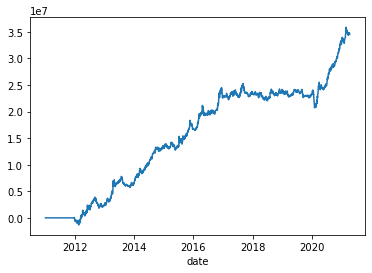

                 madist-commod_mkts-24-80-5
sharp_ratio_10y                    1.278429
sharp_ratio_1y                     3.484346
sharp_ratio_2y                     1.846331
sharp_ratio_3y                     1.344453
sharp_ratio_4y                     1.020339
sharp_ratio_5y                     1.061315
sharp_ratio_6y                     1.186597
sharp_ratio_8y                     1.325280
std_pnl_10y                   176413.782590
std_pnl_1y                    186488.684009
std_pnl_2y                    202546.341241
std_pnl_3y                    182379.010306
std_pnl_4y                    178727.447554
std_pnl_5y                    183371.126598
std_pnl_6y                    187707.647496
std_pnl_8y                    183711.586612


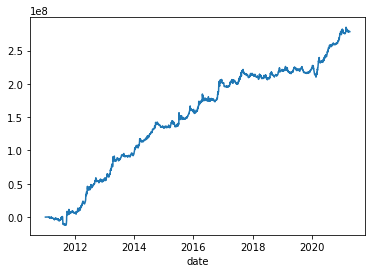

date
2021-03-02    2.811676e+08
2021-03-03    2.808777e+08
2021-03-04    2.811410e+08
2021-03-05    2.797915e+08
2021-03-08    2.811971e+08
2021-03-09    2.822815e+08
2021-03-10    2.806419e+08
2021-03-11    2.795155e+08
2021-03-12    2.803606e+08
2021-03-15    2.806499e+08
2021-03-16    2.811511e+08
2021-03-17    2.798548e+08
2021-03-18    2.799597e+08
2021-03-19    2.793283e+08
2021-03-22    2.781013e+08
2021-03-23    2.787954e+08
2021-03-24    2.782773e+08
2021-03-25    2.784370e+08
2021-03-26    2.783055e+08
2021-03-29    2.780254e+08
2021-03-30    2.786931e+08
2021-03-31    2.785527e+08
2021-04-01    2.785660e+08
2021-04-02    2.790373e+08
2021-04-06    2.790615e+08
2021-04-07    2.789933e+08
2021-04-08    2.783384e+08
2021-04-09    2.785016e+08
2021-04-12    2.783542e+08
2021-04-13    2.784377e+08
Name: daily_pnl, dtype: float64
                            0
sharp_ratio_10y  1.617130e+00
sharp_ratio_1y   2.887926e+00
sharp_ratio_2y   1.876072e+00
sharp_ratio_3y   1.459923e+00
sha

In [6]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]

metal_all_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
mixed_metal_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni', 'sn', 'SM', 'SF', 'pb']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'ni', 'sn', \
               'l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd'] 
product_list = commod_mkts # metal_all_mkts # mixed_metal_mkts #  
#mixed_metal_mkts # commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts  
product_name = 'commod_mkts'
run_mode = 'madist'
start_date = datetime.date(2011,1,1)
end_date = datetime.date(2021,4,13)
cost_ratio = 0.5
#save_loc = "C:\\dev\\data\\selected_ts_" + run_mode + "_" + product_name + "_" + str(end_date) + '_'
save_loc = "C:\\dev\\data\\combined_tsmom_" + product_name + "_" + str(end_date) + '_'
pos_std = 1
std_win = 20
ma_win = 120
rebal = 5
#index_list = range(8, 88, 8) # range(10, 110, 10) #range(10, 250, 10) # 
#column_list = [60, 80, 100, 120, 140, 160] #range(10, 130, 10) #[1, 3, 5, 10, 15, 20] #range(10, 90, 10) #[i * 0.01 for i in range(0, 32, 4)] #
sratio = {}
run_sratio = False
run_pos_sum = True
pos_sum = pd.DataFrame()
pos_list = []
#scenarios = list(itertools.product(index_list, column_list))
#ind_metal_mkts
#scenarios = [('momma', 1.0, 20, 50, 5, [0.0]), ('momma', 1.0, 30, 120, 5, [0.0]), ('momma', 1.0, 40, 30, 5, [0.0]), \
#            ('mixedmom', 1.0, 10, 1, 10, [0.0]), ('mixedmom', 1.0, 20, 1, 10, [0.0]), \
#            #('rsi', 1.0, 10, 1, 5, [0.08]), ('rsi', 1.0, 20, 1, 5, [0.0]), \
#            ('rsima', 1.0, 20, 30, 5, [0.0]), ('rsima', 1.0, 40, 30, 5, [0.0]), ('rsima', 1.0, 60, 30, 5, [0.0]), \
#            ('madist', 1.0, 8, 80, 5, [1.5, 2.0]), ('madist', 1.0, 16, 80, 5, [1.5, 2.0]), ('madist', 1.0, 24, 80, 5, [1.5, 2.0]),]
#commod_mkts
scenarios = [('momma', 1.0, 40, 30, 5, [0.0]), \
            ('momma', 1.0, 40, 80, 5, [0.0]), \
            ('mixedmom', 1.0, 10, 1, 10, [0.0]), \
            ('mixedmom', 1.0, 20, 1, 10, [0.0]), \
            ('mixedmom', 1.0, 220, 1, 10, [0.0]), \
            ('rsima', 1.0, 30, 40, 5, [0.0]), \
            ('rsima', 1.0, 30, 110, 5, [0.0]), \
            ('madist', 1.0, 8, 80, 5, [1.5, 2.0]), \
            ('madist', 1.0, 16, 80, 5, [1.5, 2.0]), \
            ('madist', 1.0, 24, 80, 5, [1.5, 2.0]),]

if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()
weight = 1.0

for scen in scenarios:
    if len(scen) == 2:
        scen_x = scen[0]
        scen_y = scen[1]
        if run_mode in ['mixedmom']:
            win = scen_x
            ma_win = 1
            rebal = scen_y
            params = [0.0]
        elif run_mode == 'rsi':
            win = scen_x
            rebal = 5
            ma_win = 1
            params = [scen_y * 0.01]
        elif run_mode in ['momma', 'rsima', 'madist']:
            win = scen_x
            ma_win = scen_y
            rebal = 5
            params = [1.5, 2.0]
        else:
            print("unsupported run_mode")
            continue
    elif len(scen) >= 6:
        run_mode = scen[0]        
        weight = scen[1]
        win = scen[2]
        ma_win = scen[3]
        rebal = scen[4]
        params = scen[5]
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([run_mode, product_name, str(win), str(ma_win), str(rebal)])
    run_args['cost_ratio'] = cost_ratio
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['run_mode'] = run_mode
    res = run_ts_test(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0)     
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharp_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
print(port_pnl[-30:])
print(vdf)

cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:
    print(pos_sum)
if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])


In [6]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    
if run_sratio and save_xl:
    xlfile = save_loc + "sratio_heatmap.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for yr in sratio_years:
        lbl = 'sharp_ratio_' + str(yr) + 'y'
        sratio[yr].to_excel(writer, lbl, startcol= 0, startrow=1)
    writer.save()    